In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'US_youtube_trending_data.csv'
original_df = pd.read_csv(path)

In [3]:
original_df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [4]:
required_columns = ['video_id', 'title', 'categoryId', 'view_count', 'likes', 'dislikes', 'comment_count']
cleaned_df = original_df[required_columns].copy()
cleaned_df.head()
del original_df

In [5]:
import json

with open('US_category_id.json', 'r') as file:
  ids_json = json.loads(file.read())

In [6]:
ids_json = ids_json['items']

In [7]:
category_map = dict([ (int(entry['id']), entry['snippet']['title']) for entry in ids_json ])

In [8]:
cleaned_df.head()

,video_id,title,categoryId,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,22,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,20,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,24,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,10,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,26,1123889,45802,964,2196


In [9]:
upt_df = pd.DataFrame(cleaned_df['categoryId'].map(category_map))
cleaned_df.update(upt_df)

In [10]:
cleaned_df.head()

,video_id,title,categoryId,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,People & Blogs,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Gaming,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,Entertainment,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,Music,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Howto & Style,1123889,45802,964,2196


<AxesSubplot:>

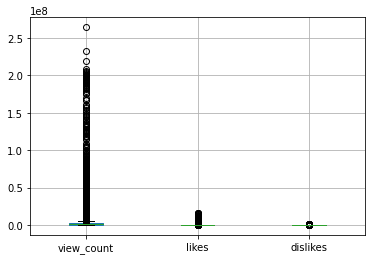

In [11]:
cleaned_df[['view_count', 'likes', 'dislikes']].boxplot()

In [12]:
cleaned_df.describe()

,view_count,likes,dislikes,comment_count
count,8.739100e+04,8.739100e+04,87391.000000,8.739100e+04
mean,2.821497e+06,1.534434e+05,3194.051149,1.446321e+04
std,7.295251e+06,4.349874e+05,13646.759773,1.014678e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.424725e+05,2.159650e+04,378.000000,1.788000e+03
50%,1.129017e+06,5.271200e+04,873.000000,4.060000e+03
75%,2.544424e+06,1.339945e+05,2299.000000,9.722500e+03
max,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06


In [13]:
cleaned_df[cleaned_df['view_count'] < 1e6]

,video_id,title,categoryId,view_count,likes,dislikes,comment_count
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,Music,496771,23251,1856,7647
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,Entertainment,949491,77487,746,7506
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,Howto & Style,470446,47990,440,4558
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,Music,741028,113983,4373,5618
10,49Z6Mv4_WCA,i don't know what im doing anymore,People & Blogs,940036,87111,1860,7052
...,...,...,...,...,...,...,...
87378,iI2lyqUbA0I,Forza Horizon 5 Let's Play : Choosing Our Firs...,Gaming,479466,23529,428,2170
87380,JPbd-25_Vi0,France beats Spain to win UEFA Nations League!...,Sports,616772,7690,488,2242
87385,rv_Y4hRDVzI,Anti-Social Club,Film & Animation,667456,66526,771,4679
87388,1305aQZDojw,I GOT MY WISDOM TEETH REMOVED and called my CR...,Entertainment,891663,15046,702,1429


In [14]:
cleaned_df

,video_id,title,categoryId,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,People & Blogs,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,Gaming,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,Entertainment,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,Music,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,Howto & Style,1123889,45802,964,2196
...,...,...,...,...,...,...,...
87386,A8rrr_w8rfk,The Dream Guy - SNL,Comedy,3786620,70110,4068,4336
87387,TYd_pT9hZrM,Squid Game stars take on the Dalgona Challenge...,Entertainment,21483059,777884,4725,17451
87388,1305aQZDojw,I GOT MY WISDOM TEETH REMOVED and called my CR...,Entertainment,891663,15046,702,1429
87389,74LaDIdx64c,"Food Theory: Yes, You SHOULD Eat Your Pokemon!",Howto & Style,1781630,91434,1589,8954


<AxesSubplot:ylabel='categoryId'>

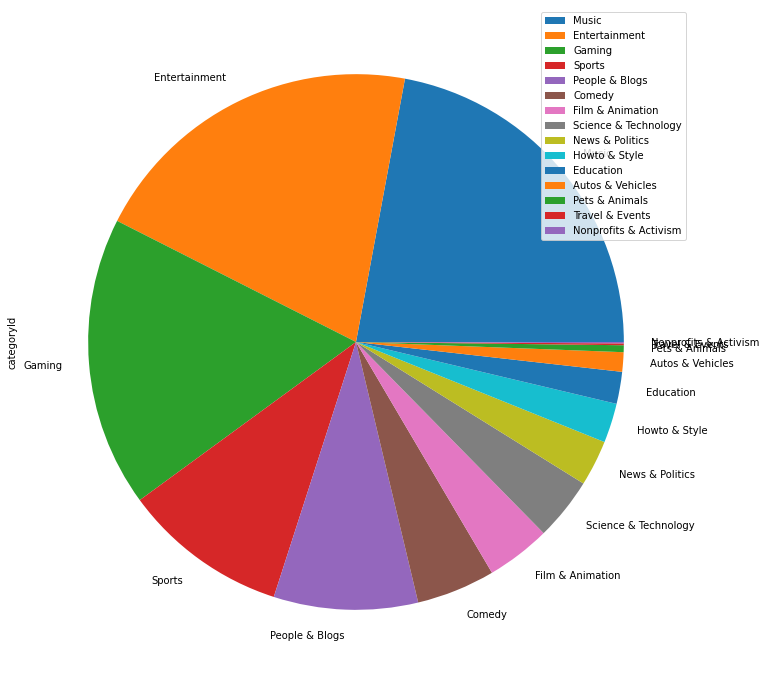

In [19]:
legend = cleaned_df[cleaned_df['view_count'] > 1e6]['categoryId'].to_list()
cleaned_df[cleaned_df['view_count'] > 1e6]['categoryId'].value_counts().plot.pie(legend=legend, figsize=(12,20))

In [20]:
cleaned_df[cleaned_df['view_count'] > 1e6].to_csv('US_youtube_trending_data_processed.csv')